# core

In [1]:
"""
core.py
環境とエージェントの抽象クラス
"""
import numpy as np


class coreEnv:
    """ 環境の抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.n_act = 4  # <--- 行動数を設定
        self.done = False
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False
        # ------------------------- 編集ここから
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return obs

    def step(self, act):
        """ 状態を更新 """
        # 最終状態の次の状態はリセット
        if self.done is True:
            obs = self.reset()
            return None, None, obs
        # ------------------------- 編集ここから
        rwd = 1.0                   # float
        done = True                 # bool
        # ------------------------- ここまで
        self.done = done
        # ------------------------- 編集ここから
        # self.done を使った処理
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return rwd, done, obs

    def render(self):
        """ 状態に対応した画像を作成 """
        # ------------------------- 編集ここから
        # img: 3d ndarray
        img = np.zeros((100, 200, 3), dtype=np.uint8)
        # ------------------------- ここまで
        return img


class coreAgt:
    """ エージェントの抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = 0.4
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        act = 0  # int
        # ------------------------- ここまで
        return act

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:
            return
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        Q = np.ndarray([0, 0])  # ndarray
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def load_weights(self, filepath):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # ------------------------- ここまで


### env_myenv

In [2]:
# # import cv2
# import numpy as np
# # import core
# import mujoco
# # from tqdm import trange

# xml_path = './xml_models/micromouse.xml'
# times = []
# left_motor_kakusokudo = []
# right_motor_kakusokudo = []
# sensor_LF = []
# sensor_LS = []
# sensor_RF = []
# sensor_RS = []



# class MyEnv(coreEnv):

#     def __init__(self): #引数で受け取るとかは特にないからこんな感じ　各インスタンス変数に値を入れていく
#         self.n_act = 5
#         self.done = False #最初だからFalse
#         self.state = None #状態表示用変数
#         self.m = mujoco.MjModel.from_xml_path(xml_path)#modelを読み込んで用意
#         self.d = mujoco.MjData(self.m) #モデルのデータを用意

#     def reset(self):
#         """ 状態を初期化 """
#         self.done = False
#         # ------------------------- 編集ここから
#         self.state = 'start'
#         mujoco.mj_resetData(self.m, self.d)
#         obs = np.array([0, 0, 0, 0])  # ndarray
#         # ------------------------- ここまで
#         return obs
    
#     def step(self, act):
#         """ 状態を更新 """
#         # 最終状態の次の状態はリセット
#         if self.done is True:
#             obs = self.reset()
#             return None, None, obs
#         # ------------------------- 編集ここから
#         self.d.ctrl = act
#         mujoco.mj_step(self.m, self.d)
#         mujoco.mj_kinematics(self.m, self.d)
#         goal_pos = self.d.geom('goal').xpos
#         mm_pos = self.d.geom('mein_body').xpos
#         self.goal_range = np.sqrt((goal_pos[0] - mm_pos[0])**2+(goal_pos[1] - mm_pos[1])**2)

#         rwd = -self.goal_range      # float  goalとの距離がそのまま罰になる
#         done = False                 # bool

#         if self.goal_range < 0.06: #ゴールに十分近かったら報酬を与えて，終了判定
#             rwd = 300
#             done = True

#         # ------------------------- ここまで
#         self.done = done
#         # ------------------------- 編集ここから
#         # self.done を使った処理
#         ob1 = self.d.sensordata[0].copy() #sensor_LF
#         ob2 = self.d.sensordata[1].copy() #sensor_LS
#         ob3 = self.d.sensordata[2].copy() #sensor_RF
#         ob4 = self.d.sensordata[3].copy() #sensor_RS
#         obs = np.array([ob1, ob2, ob3, ob4])  # ndarray
#         # ------------------------- ここまで
#         return rwd, done, obs
    
#     def render(self):
#         """ 状態に対応した画像を作成 """
#         # ------------------------- 編集ここから
#         # img: 3d ndarray
#         self.viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
#         # ------------------------- ここまで
#         return

# agt_TableQ

In [3]:
"""
agt_tableQ.py
Qテーブルを使ったQ学習アルゴリズム
"""
import sys
import pickle
import numpy as np

# 自作モジュール
# import core


class TableQAgt(coreAgt):
    """ Qテーブルを使ったQ学習エージェントクラス """
    def __init__(           # 引数とデフォルト値の設定 (A)
            self,
            n_act=4,            # int: 行動の種類数
            init_val_Q=0,       # float: Q値の初期値
            epsilon=0.1,        # float: 乱雑度
            alpha=0.1,          # float: 学習率
            gamma=0.9,          # float: 割引率
            max_memory=101,     # int: 記憶する最大の観測数
            filepath=None,      # str: 保存用ファイル名
            ):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = epsilon
        # ------------------------- 編集ここから
        self.n_act = n_act
        # エージェントのハイパーパラメータ (B)
        self.init_val_Q = init_val_Q
        self.gamma = gamma
        self.alpha = alpha

        # 保存ファイル名 (C)
        self.filepath = filepath

        # Qテーブル関連 (D)
        self.Q = {}     # Qテーブルの辞書を用意
        self.len_Q = 0  # Qテーブルに登録した観測の数記録変数　最初だから０
        self.max_memory = max_memory #記録する最大の観測数
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        # obsを文字列に変換 (A)　辞書でやってるから，ndarray型を変える必要があるので文字列に変換しといてる
        obs = str(obs)

        # obs が登録されていなかったら初期値を与えて登録 (B) #登録されていたら何もしない
        self._check_and_add_observation(obs)

        # 確率的に処理を分岐 (C)
        if np.random.rand() < self.epsilon:
            # epsilon の確率(D)
            act_select = np.random.randint(0, self.n_act)  # ランダム行動選択
            print("ランダム選択しました")
        else:
            # 1-epsilon の確率(E)
            act_select = np.argmax(self.Q[obs])  # Qを最大にする行動 (Q値が最大の行動？のほうが表現として正しそう)
            # print("今の座標のQtableこれを見て行動を決めます:",self.Q[obs])

        # ------------------------- ここまで
        return act_select

    def _check_and_add_observation(self, obs):
        """ obs が登録されていなかったら初期値0を与えて登録 """
        if obs not in self.Q:  # (A) セルフQにその辞書のキーがなかったら，
            self.Q[obs] = [self.init_val_Q] * self.n_act  # (B)　obsをキーとして，Qの初期値をact個用意して追加
            self.len_Q += 1  # (C)　追加したので，Qの大きさの変数を１増やす
            if self.len_Q > self.max_memory:  # (D)　Qの大きさがマックスを超えたら
                print(f'観測の登録数が上限 ' +
                      f'{self.max_memory:d} に達しました。')
                sys.exit() #プログラムは即座に終了
            if (self.len_Q < 100 and self.len_Q % 10 == 0) or \
                    (self.len_Q % 100 == 0):  # (E) 100以下で１０で割り切れる場合　または　１００で割り切れる場合
                print(f'the number of obs in Q-table' +
                      f' --- {self.len_Q:d}') #表示する

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:  # rwdがNoneだったら戻る(A)
            return
        # ------------------------- 編集ここから
        # obs, next_obs を文字列に変換 (B)　今とその次のobsを使って学習を行うために必要
        obs = str(obs)
        # print(obs)
        next_obs = str(next_obs)
        # print("next",next_obs)

        # next_obs が登録されていなかったら初期値を与えて登録 (C)
        self._check_and_add_observation(next_obs)

        # 学習のターゲットを作成 (D)
        if done is True: #動的計画法の一番後ろだったら期待値は報酬そのものであるため
            target = rwd
        else: #動的計画法的に，まだエピソードが終わらない場合の期待値はその報酬とその次の状態の最大のＱ値をとる行動のＱ値であるため
            target = rwd + self.gamma * max(self.Q[next_obs])

        # Qをターゲットに近づける (E)
        self.Q[obs][act] = (1 - self.alpha) * self.Q[obs][act] + self.alpha * target #平均の更新足　ここではQ値の更新則
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        obs = str(obs) #受け取ったobsを文字列に変換して，
        if obs in self.Q:   # obsがQにある (A)場合はその値を取り出す（その状態での各行動のQ値がそれぞれ出る）
            val = self.Q[obs]
            Q = np.array(val) #nparray型に変換してから返す
        else:               # obsがQにない (B)
            Q = None #なければないで終わり
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath=None):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # Qテーブルの保存
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='wb') as f:
            pickle.dump(self.Q, f) #Q値を保存する　
        # ------------------------- ここまで

    def load_weights(self, filepath=None):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # Qテーブルの読み込み
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='rb') as f:
            self.Q = pickle.load(f) #ここでQ値を復元してる
        # ------------------------- ここまで


# MyEnv

In [4]:
"""
sibuyaatusiタスク
"""

import numpy as np  # ベクトル・行列演算ライブラリ (A)
import mujoco
from tqdm import trange

NUM_DIZITIZED = 10
MAX_STEP = 12000


class MyEnv(coreEnv):
    """ コリドータスクの環境クラス """


    def __init__(                   # (B)
            self,
            ):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.n_act = 4  # <--- 行動数を設定 (C)
        self.done = False
        # ------------------------- 編集ここから
        """ インスタンス生成時の処理 """
        # タスクパラメータ (D)
        self.grid_world_height = 5,
        self.grid_world_width = 5,
        self.init_xpos = 0 #ロボットの初期x位置座標
        self.init_ypos = 0 #ロボットの初期y位置座標
        self.now_pos = [self.init_xpos,self.init_ypos]
        self.obstacle_pos = [0,2]
        self.treasure_pos = [1,1]
        self.goal_pos = [2,4]
        self.hosuu_record = np.zeros((5, 5))
        self.stepcount = 0
        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False  # (A)
        # ------------------------- 編集ここから
        # ロボットの位置を開始位置へ戻す (C)####################################################################################################env.model.geom_pos
        # self.data.qpos = self.init_pos
        # self.data.qvel = self.init_vel #的な感じにして，初期の位置を与えることで初期位置に戻せるようにする　初期値を記述する　pauseしてからprint dataで取れそう？
        self.stepcount = 0

        # 初期の観測値を用意 (E)
        observation = [self.init_xpos,self.init_ypos] #[0,0]
        self.now_pos = [0,0]
        self.hosuu_record[0][0] += 1 #歩数計測
        # ------------------------- ここまで
        return observation

    # def _make_obs(self): #クラスの内部でしか使わない，内部用メソッドであるため_をつけている
    #     """ 状態から観測を作成(状態（観測）の離散化を行って観測とする) """
    #     # 最終状態判定がTrueだったら 9,9 を出力 (A)
    #     if self.done is True:
    #         obs = np.array([9] * 2)
    #         return obs #どうせこの後はリセットするし，あまり意味はないかも
        
        # 4つのセンサの値を受け取り，それを離散化して0~9で表したのち，4桁の整数１つとして観測を表す
        # if action == 0: # 上
        #     now_ypos + 1
        # if action == 1:# 右
        #     now_xpos + 1
        # if action == 2:# 左
        #     now_xpos - 1
        # if action == 3:# 下
        #     now_ypos - 1

        # if now_xpos == -1:
        #     now_xpos = 0
        # if now_xpos == 5:
        #     now_xpos = 4
        # if now_ypos == -1:
        #     now_ypos = 0
        # if now_ypos == 5:
        #     now_ypos = 4


        # obs = [now_xpos, now_ypos]
        # return obs

    def step(self, act_select):
        """ 状態を更新 """
        # 最終状態の次の状態はリセット(A)
        if self.done is True:
            observation = self.reset()
            return 0, None, observation
        
        # step数が基準を超えたら
        if self.stepcount == MAX_STEP:
            observation = self.reset()
            rwd = -0.1
            return rwd, None, observation
        
        # print("移動前の座標は:",self.now_pos)
        # print("選ばれた行動:",act_select)
        if act_select == 0: #上
            self.now_pos[1] += 1
            print("上に動きました")
        elif act_select == 1: #右
            self.now_pos[0] += 1
            print("右に動きました")
        elif act_select == 2: #左
            self.now_pos[0] -= 1
            print("左に動きました")
        elif act_select == 3: #下
            self.now_pos[1] -= 1
            print("下に動きました")
        # elif act_select == 4:
        #     act = [0, 0] #行動選択を具体的なモータ出力に変換している(モータを動かす組み合わせを選ぶ)
        else:
            print("ありえない行動選択をしているこれはバグに違いない")
            
        #行動選択のactをctrlにコピーすることで，モータを回す
        # before_goal_range = np.sqrt((before_goal_pos[0] - before_mm_pos[0])**2+(before_goal_pos[1] - before_mm_pos[1])**2) #三平方の定理
        
        self.stepcount += 1 #step数を測るためのインスタンス変数
        if self.now_pos == self.goal_pos: #ゴールしたら
            rwd = 5
            # print("goal!!")
            whatdone = True
        elif self.now_pos == self.treasure_pos: #宝拾ったら 
            rwd = 3
            whatdone = True
        elif self.now_pos == self.obstacle_pos: #障害物拾ったら 
            rwd = -3
            whatdone = True
        # elif 
        else:
            rwd = 0
            whatdone = False

        # ------------------------- ここまで
        self.done = whatdone  # (E) #確定したdone情報を，インスタンス変数のdoneに保存
        # ------------------------- 編集ここから
        if self.now_pos[0] == -1:
            self.now_pos[0] = 0
            rwd -= 0.1
        if self.now_pos[1] == -1:
            self.now_pos[1] = 0
            rwd -= 0.1
        if self.now_pos[0] == 5:
            self.now_pos[0] = 4
            rwd -= 0.1
        if self.now_pos[1] == 5:
            self.now_pos[1] = 4
            rwd -= 0.1

        

        
        # print("移動後の座標：",self.now_pos) #移動後の座標
        x,y = self.now_pos
        
        self.hosuu_record[x][y] += 1 #歩数計測
        observation = self.now_pos  # 行動後のobsを作成(F) ここではセンサ値を取得する　next_obsに対応している値で，行動後の観測値である．
        # ------------------------- ここまで
        return rwd, whatdone, observation

    def render(self):
        """ 状態に対応した画像を作成 """ #工事中################＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
        mujoco.viewer.launch_passive(self.model, self.data).sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する



In [5]:
import numpy as np

# 5x5の行列を作成
matrix = np.zeros((5, 5))

# 表示
print(matrix[0][1])


0.0


In [6]:

# if __name__ == '__main__':
#     # 操作方法の表示 (A)
#     msg = (
#         '\n' +
#         '---- 操作方法 -------------------------------------\n'
#         '[f] 右に進む\n' +
#         '[d] 拾う\n' +
#         '[q] 終了\n' +
#         'クリスタルを拾うと成功\n' +
#         '---------------------------------------------------'
#     )
#     print(msg)

#     # 環境の準備 (B)
#     env = MyEnv()

#     # 環境のパラメータの与え方例
#     """
#     env = CorridorEnv(
#         field_length=6,
#         crystal_candidate=(2, 3, 4, 5),
#         rwd_fail=-1,
#         rwd_move=0,
#         rwd_crystal=10,
#     )
#     """

#     # 強化学習情報の初期化 (C)
#     t = 0
#     obs = env.reset()
#     act = None
#     rwd = None
#     done = None

#     # 開始の表示 (D)
#     print('')
#     print('あなたのプレイ開始')

#     # 強化学習情報表示の関数定義 (E)
#     def show_info(t, act, rwd, done, obs, isFirst=False):
#         """ 強化学習情報の表示 """
#         if rwd is None:  # (F)
#             if isFirst:
#                 tt = t
#             else:
#                 tt = t + 1
#             print('')
#             print(f'x({tt:d})={str(obs):s}')
#         else:  # (G)
#             msg = (
#                 f'a({t:d})={act:d}, ' +
#                 f'r({t:d})={rwd: .2f}, ' +
#                 f'done({t:d})={done:}, ' +
#                 f'x({t + 1:d})={str(obs):s}'
#             )
#             print(msg)

#     # 強化学習情報表示 (H)
#     show_info(t, act, rwd, done, obs, isFirst=True)

#     # シミュレーション (I)
#     while True:
#         # 画面表示 (J)
#         image = env.render()
#         cv2.imshow('you', image)

#         # キーの受付と終了処理 (K)
#         key = cv2.waitKey(0)
#         if key == ord('q'):
#             break

#         # あなたの行動選択 (L)
#         if key in [ord('d'), ord(' ')]:
#             act = 0  # 拾う
#         elif key == ord('f'):
#             act = 1  # 進む
#         else:
#             continue

#         # 環境の更新 (M)
#         rwd, done, obs = env.step(act)

#         # 強化学習情報表示 (N)
#         show_info(t, act, rwd, done, obs)
#         t += 1
# 回転の運動方程式から考えて，力学が何が起きているか考える　摩擦適当じゃんそれはまずい．ご法度　

# 実行部分（main?）

上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
左に動きました
上に動きました
上に動きました
上に動きました
上に動きました
ランダム選択しました
下に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きました
上に動きま

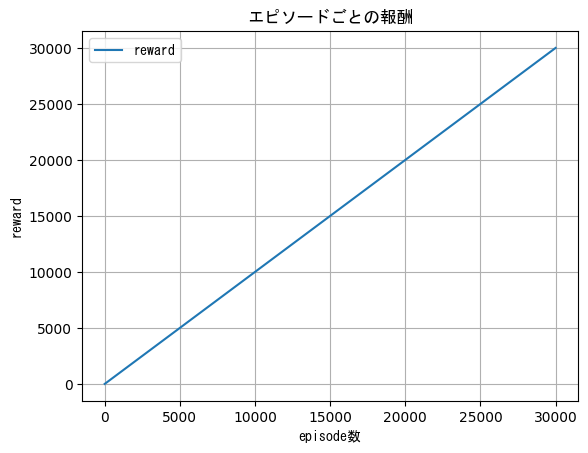

c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27497 (\N{CJK UNIFIED IDEOGRAPH-6B69}) missing from current font.
  fig.canvas.draw()
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27497 (\N{CJK UNIFIED IDEOGRAPH-6B69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


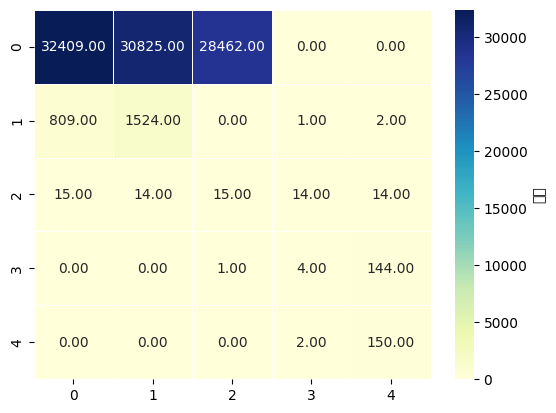

In [9]:
from tqdm import trange
import numpy as np
import seaborn as sns
# import mujoco
# import mujoco.viewer
import time
import matplotlib.pyplot as plt
MAX_STEP = 500
NUM_EPISODE = 30000
epi_reward_graph = []
# timestep_count = []
sumreward = 0


env = MyEnv()
agt = TableQAgt()

# with mujoco.viewer.launch_passive(env.model,env.data) as viewer: #mujoco描画起動

obs = env.reset() #エピソード初期の観測を取得  ００の地点から始まる
for episode_num in range(NUM_EPISODE):
    for step_num in range (MAX_STEP):
        # time.sleep(1)  # 1秒間停止
        # print("now_pos",env.now_pos)
        # print("obs:",obs)
        act = agt.select_action(obs) #obsにより，行動を決める　Qテーブルのそのマス目を用意して，たまにイプシロングリーディでランダム動作が起きる
        # print("obs1:",obs)
        rwd, done, next_obs = env.step(act)
        # print("obs2:",obs)
        # viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
        agt.learn(obs, act, rwd, done, next_obs)
        # print("obs3:",obs)
        # print(obs)####################
        # print("obs(行動前)",obs)
        # print("next(行動後)",next_obs)
        obs = next_obs #実質ここで移動　つまりnow_posの更新はここですべき？
        # print("obs = next_obsしたあとのobs",obs)
        sumreward += rwd
        if done == True:
            obs = env.reset() #エピソード初期の観測を取得
            break
    # epi_reward_graph.append(sumreward)
    
    sumreward = 0

def generate_numbered_array(length):
    return list(range(1, length+1))

# 例: 長さ指定の配列を生成
epi_reward_graph = [i for i in range(NUM_EPISODE)]
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

sns.heatmap(env.hosuu_record, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': '歩数'})

# グラフを表示
plt.show()

[[52 93 15 72 61]
 [21 83 87 75 75]
 [88 24  3 22 53]
 [ 2 88 30 38  2]
 [64 60 21 33 76]]
[[ 0.  1.  1.  1.  2.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0. 33.]]


c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27497 (\N{CJK UNIFIED IDEOGRAPH-6B69}) missing from current font.
  fig.canvas.draw()
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27497 (\N{CJK UNIFIED IDEOGRAPH-6B69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\atusi\anaconda3\envs\colab_env2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


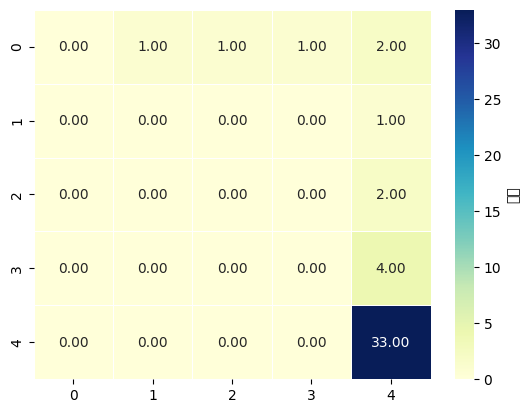

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 5x5のリストを作成し、ランダムな歩数で初期化
np.random.seed(42)  # 再現性のためにシードを設定
walk_matrix = np.random.randint(1, 100, (5, 5))
print(walk_matrix)
print(env.hosuu_record)
# Seabornのヒートマップを作成
sns.heatmap(env.hosuu_record, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': '歩数'})


# グラフを表示
plt.show()


In [11]:
print(env.hosuu_record)

[[ 0.  1.  1.  1.  2.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0. 33.]]


In [3]:
import numpy as np

def discretize_sensor_values(sensor_values, num_bins_per_sensor):
    discretized_values = []
    for sensor in sensor_values:
        # センサの値をビンに分割
        bins = np.linspace(min(sensor), max(sensor), num_bins_per_sensor)
        discretized = np.digitize(sensor, bins)
        discretized_values.append(discretized)
    return discretized_values

# サンプルセンサの値
sensor_values = [
    np.random.uniform(0, 10, 100),  # センサ1の値
    np.random.uniform(0, 20, 100),  # センサ2の値
    np.random.uniform(5, 15, 100),  # センサ3の値
    np.random.uniform(0, 5, 100)    # センサ4の値
]

# センサの値を3つのビンに離散化
num_bins_per_sensor = 5
discretized_values = discretize_sensor_values(sensor_values, num_bins_per_sensor)

# 結果の表示
for i, values in enumerate(discretized_values):
    print(f"センサ{i + 1}の離散化結果:")
    print(values)
    print()


センサ1の離散化結果:
[2 4 4 4 1 4 1 3 2 2 2 4 4 4 1 4 2 3 1 3 3 4 2 4 4 3 3 2 4 4 4 2 3 3 2 4 3
 2 4 2 3 1 4 1 5 4 1 1 2 2 2 2 2 3 2 1 2 1 1 1 3 4 2 3 2 3 3 2 1 2 4 3 4 4
 2 2 1 3 2 4 2 1 2 1 2 2 4 2 1 1 4 1 2 1 3 4 1 4 4 2]

センサ2の離散化結果:
[2 1 4 3 1 2 5 4 2 4 4 2 2 1 1 2 1 2 4 3 4 3 2 1 1 2 1 2 4 3 2 2 1 1 3 4 1
 2 1 2 1 1 1 2 4 1 4 1 3 1 1 3 2 1 3 1 4 1 1 2 4 1 2 3 2 4 3 3 2 3 3 3 1 4
 2 1 1 2 1 3 2 3 4 3 4 2 3 1 2 2 1 3 1 3 4 4 4 3 4 4]

センサ3の離散化結果:
[4 1 2 3 4 3 1 4 2 3 2 2 4 1 3 2 1 2 2 3 1 4 1 4 2 3 4 3 1 4 4 3 4 4 2 4 1
 3 4 1 3 1 4 2 5 3 3 4 1 4 4 1 2 2 1 1 1 1 3 4 4 3 3 2 3 1 3 1 1 3 2 2 1 1
 1 1 2 3 4 3 3 2 1 3 1 2 1 2 1 3 4 1 4 4 1 2 4 4 4 2]

センサ4の離散化結果:
[4 3 3 4 4 2 3 3 3 4 3 3 3 4 1 1 1 2 3 4 3 1 2 4 2 3 1 1 2 2 3 3 3 2 1 4 1
 3 4 2 2 2 1 1 4 1 1 3 1 2 2 3 3 2 4 2 2 2 2 1 4 2 2 1 1 1 2 1 2 2 3 3 3 2
 1 4 1 4 4 3 3 5 2 2 4 2 2 3 4 3 4 4 3 2 1 1 2 1 3 1]



In [18]:
print(env.data.xquat[1])

[ 9.99999060e-01  9.92104958e-24 -1.37118702e-03  4.89481227e-20]


ValueError: x and y must have same first dimension, but have shapes (99,) and (100,)

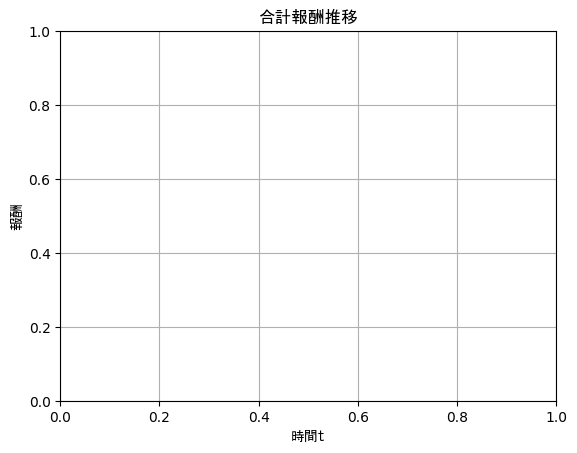

In [7]:
# 例: 長さ指定の配列を生成
def generate_numbered_array(length):
    return list(range(1, length+0))
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("報酬", fontname="MS Gothic")
plt.grid()
plt.title("合計報酬推移", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

In [8]:
print(env.model.geom_pos)

[[ 0.     0.     0.   ]
 [ 0.     0.     0.001]
 [ 0.04   0.03   0.001]
 [ 0.04  -0.03   0.001]
 [-0.04   0.03   0.001]
 [-0.04  -0.03   0.001]
 [-0.027  0.     0.001]
 [ 0.027  0.     0.001]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


In [3]:
import numpy as np
ob1 = 0.7
obs=np.digitize(ob1, 0.0, 0.18, 10)*1000

TypeError: digitize() takes from 2 to 3 positional arguments but 4 were given

# agt_netQ

In [3]:
# """
# agt_netQ.py
# ニューラルネット（Qネットワーク）を使ったQ学習アルゴリズム
# """
# import numpy as np
# import os
# import torch
# from torch import nn

# import torch.optim as optim
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense, Flatten




# import mujoco

# # 自作モジュール
# # import core


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [ ]:
# # ネットワークの定義
# class SimpleNet(nn.Module):
#     def __init__(self):
#         super(SimpleNet, self).__init__()
#         self.fc1 = nn.Linear(4, 32)  # 入力層から中間層への結合
#         self.fc2 = nn.Linear(32, 2)  # 中間層から出力層への結合

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))  # 中間層でReLUを使用
#         x = self.fc2(x)  # 出力層では活性化関数を使わない（恒等関数）
#         return x

# # ネットワークのインスタンス化
# net = SimpleNet()

# # オプティマイザの定義
# optimizer = optim.Adam(net.parameters(), lr=0.01)

# # ネットワークの構造を表示
# print(net)



SimpleNet(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (relu): ReLU()
)


In [ ]:
# class NetQAgt(coreAgt):
#     """ Qネットワークを使ったQ学習エージェントクラス """
#     def __init__(               # 引数とデフォルト値の設定 (A)
#             self,
#             n_act=3,            # int: 行動の種類数（ネットワークの出力数）
#             input_size=(4,),    # tuple of int: 入力サイズ
#             n_dense=32,         # int: 中間層のニューロン数
#             epsilon=0.1,        # float: 乱雑度
#             gamma=0.9,          # float: 割引率
#             filepath=None,      # str: 保存ファイル名
#             ):
#         """ 初期処理 """
#         # 引数の設定は適時編集
#         self.epsilon = epsilon
#         # ------------------------- 編集ここから

#         # アトリビュートにパラメータを保存 (B)
#         self.n_act = n_act
#         self.input_size = input_size
#         self.n_dense = n_dense
#         self.gamma = gamma
#         self.filepath = filepath

#         # アトリビュートにモデルを保存 (C)
#         self.model = self._build_Qnet()
#         # ------------------------- ここまで

#     def _build_Qnet(self):
#         """ 指定したパラメータでQネットワークを構築 """
#         # Qネットワークの構築 (A)
#         self.net = SimpleNet()
#         # オプティマイザの定義
#         self.optimizer = optim.Adam(net.parameters(), lr=0.01)
#         # 損失関数の定義
#         self.criterion = nn.CrossEntropyLoss()

#         return net

#     def select_action(self, obs):
#         """  観測に対して行動を出力 """
#     # ------------------------- 編集ここから
#     # 確率的に処理を分岐 (A)
#         if np.random.rand() < self.epsilon:
#             # ランダム行動 (B)
#             act = np.random.randint(0, self.n_act)
#         else:
#             # obsに対するQ値のリストを取得 (C)
#             Q = self.get_Q(obs)

#             # Qを最大にする行動
#             act = np.argmax(Q)
#         # ------------------------- ここまで
#         return act

#     def get_Q(self, obs):
#         """ 観測に対するQ値を出力 """
#         # ------------------------- 編集ここから
#         # 観測obsを入力し出力を得る (A)
#         Q = self.model.predict(
#             obs.reshape((1,) + self.input_size))[0, :]
#         # ------------------------- ここまで
#         return Q

#     def learn(self, obs, act, rwd, done, next_obs):
#         """ 学習 """
#         if rwd is None:
#             return
#         # ------------------------- 編集ここから

#         # obs に対するQネットワークの出力yを得る (A)
#         y = self.get_Q(obs)

#         # target にyの内容をコピーする (B)
#         target = y.copy()

#         if done is False:
#             # 最終状態でなかったら next_obsに対する next_yを得る(C)
#             next_y = self.get_Q(next_obs)

#             # Q[obs][act]のtarget_actを作成 (D)
#             target_act = rwd + self.gamma * max(next_y)
#         else:
#             # 最終状態の場合は報酬だけでtarget_actを作成 (E)
#             target_act = rwd

#         # targetのactの要素だけtarget_actにする (F)
#         target[act] = target_act

#         # obsと target のペアを与えて学習 (G)

#         # 学習のループ
#         for epoch in range(1):  # 1エポックの例
#             optimizer.zero_grad()  # 勾配をリセット
#             output = net(obs)  # フォワードパス
#             loss = self.criterion(output, target)  # 損失の計算
#             loss.backward()  # バックワードパス（勾配の計算）
#             optimizer.step()  # パラメータの更新
#         # ------------------------- ここまで
#         return 

#     # def save_weights(self, filepath=None):
#     #     """ モデルの重みデータの保存 """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model.save(filepath + '.h5', overwrite=True)
#     #     # ------------------------- ここまで

#     # def load_weights(self, filepath=None):
#     #     """ モデルの重みデータの読み込み """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model = tf.keras.models.load_model(filepath + '.h5')
#     #     # ------------------------- ここまで

    


In [ ]:

# if __name__ == '__main__':
#     # エージェントのインスタンス生成 (A)
#     agt = NetQAgt(n_act=3, input_size=(5,))

#     # 行動選択 (B)
#     obs = np.array([[1, 1, 1, 1, 1]])
#     act = agt.select_action(obs)
#     print('act', act)

#     # 学習 (C)
#     rwd = 1
#     done = False
#     next_obs = np.array([[1, 1, 1, 1, 2]])
#     agt.learn(obs, act, rwd, done, next_obs)

#     # モデル構造の表示 (D)
#     print('モデルの構造')
#     agt.model.summary()

#     # 重みパラメータの保存 (E)
#     agt.save_weights('agt_data/test')

#     # 重みパラメータの読み込み (F)
#     agt.load_weights('agt_data/test')

#     # モデルへの観測の入力 (G)
#     y = agt.model.predict(obs)
#     print('モデルの出力 y', y.reshape(-1))


In [ ]:
# from tqdm import trange
# print('mujocoで学習開始!!!')
# reward_for_graph = []

# env=MyEnv()

# agt= NetQAgt(2,4,32,0.1,0.9,)

# obs = env.reset()
# for t in range(100):
#     act = agt.select_action(obs) #たまにQ値最適の行動を選ぶ　グリーディほう
#     rwd, done, next_obs = env.step(act) 
#     reward_for_graph.append(rwd)

#     agt.learn(obs, act, rwd, done, next_obs)

#     obs = next_obs




mujocoで学習開始!!!


AttributeError: 'SimpleNet' object has no attribute 'predict'

In [ ]:
!pip uninstall tensorflow

^C


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

AttributeError: module 'tensorflow' has no attribute 'keras'

# 離散化コード

In [ ]:
def discretize(value):
    # 0から0.18の範囲を10段階に分割
    if value == -1:
        value = 0.18
    discrete_value = int(value / 0.018)
    return min(discrete_value, 9)  # 最大値が10段階目になるように調整 9以上にならないようにしている

def discretize_values(ob1, ob2, ob3, ob4):
    # 各値を離散化
    discrete_ob1 = discretize(ob1)
    discrete_ob2 = discretize(ob2)
    discrete_ob3 = discretize(ob3)
    discrete_ob4 = discretize(ob4)
    sum = discrete_ob1*1000 + discrete_ob2*100 + discrete_ob3*10 + discrete_ob4*1

    return discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum

# 例: ob1=0.05, ob2=0.10, ob3=0.15, ob4=0.18 の場合
ob1 = 0.14
ob2 = 0.10
ob3 = 0.15
ob4 = 0.18

discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum = discretize_values(ob1, ob2, ob3, ob4)

print(f"Discretized Values: {discrete_ob1}, {discrete_ob2}, {discrete_ob3}, {discrete_ob4}, {sum}")